In [1]:
import pandas as pd
import pickle
import numpy as np

In [37]:
df = pickle.load(open('dataset_3ver.pkl','rb'))

In [38]:
df

,match_id,batting_team,bowling_team,city,ball,runs,player_dismissed,total_runs_1st_innings,info.outcome.winner,venue
0,1,Pakistan,Australia,Brisbane,0.1,0,0,268,Australia,"Brisbane Cricket Ground, Woolloongabba"
1,1,Pakistan,Australia,Brisbane,0.2,0,0,268,Australia,"Brisbane Cricket Ground, Woolloongabba"
2,1,Pakistan,Australia,Brisbane,0.3,0,0,268,Australia,"Brisbane Cricket Ground, Woolloongabba"
3,1,Pakistan,Australia,Brisbane,0.4,1,0,268,Australia,"Brisbane Cricket Ground, Woolloongabba"
4,1,Pakistan,Australia,Brisbane,0.5,0,0,268,Australia,"Brisbane Cricket Ground, Woolloongabba"
...,...,...,...,...,...,...,...,...,...,...
437930,2033,Scotland,United Arab Emirates,Edinburgh,46.6,0,0,228,Scotland,"Grange Cricket Club Ground, Raeburn Place"
437931,2033,Scotland,United Arab Emirates,Edinburgh,47.1,0,0,228,Scotland,"Grange Cricket Club Ground, Raeburn Place"
437932,2033,Scotland,United Arab Emirates,Edinburgh,47.2,0,0,228,Scotland,"Grange Cricket Club Ground, Raeburn Place"
437933,2033,Scotland,United Arab Emirates,Edinburgh,47.3,0,0,228,Scotland,"Grange Cricket Club Ground, Raeburn Place"


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437935 entries, 0 to 437934
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                437935 non-null  int64  
 1   batting_team            437935 non-null  object 
 2   bowling_team            437935 non-null  object 
 3   city                    362473 non-null  object 
 4   ball                    437935 non-null  float64
 5   runs                    437935 non-null  int64  
 6   player_dismissed        437935 non-null  object 
 7   total_runs_1st_innings  437935 non-null  int64  
 8   info.outcome.winner     437935 non-null  object 
 9   venue                   437935 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 36.8+ MB


In [40]:
df.groupby('match_id')['runs'].cumsum()

0           0
1           0
2           0
3           1
4           1
         ... 
437930    225
437931    225
437932    225
437933    225
437934    229
Name: runs, Length: 437935, dtype: int64

In [41]:
df['current_score'] = df.groupby('match_id')['runs'].cumsum()

In [42]:
df['total_runs_1st_innings'] - df['current_score']

0         268
1         268
2         268
3         267
4         267
         ... 
437930      3
437931      3
437932      3
437933      3
437934     -1
Length: 437935, dtype: int64

In [43]:
# we dont increase 1 run in my 'total_runs_1st_innings' which is target so we done here

In [44]:
df['total_runs_1st_innings'] = df['total_runs_1st_innings']+1

In [45]:
df.rename(columns={'total_runs_1st_innings':'target'}, inplace=True)

In [46]:
df['runs_left'] = df['target'] - df['current_score']

In [47]:
df.head()

,match_id,batting_team,bowling_team,city,ball,runs,player_dismissed,target,info.outcome.winner,venue,current_score,runs_left
0,1,Pakistan,Australia,Brisbane,0.1,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269
1,1,Pakistan,Australia,Brisbane,0.2,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269
2,1,Pakistan,Australia,Brisbane,0.3,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269
3,1,Pakistan,Australia,Brisbane,0.4,1,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",1,268
4,1,Pakistan,Australia,Brisbane,0.5,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",1,268


In [48]:
stadium_mapping = {
    'AMI Stadium': 'Hagley Oval',
    'Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Buffalo Park': 'Buffalo Park',
    'Dubai Sports City Cricket Stadium': 'Dubai International Cricket Stadium',
    'Edgbaston': 'Edgbaston',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium',
    'Headingley': 'Headingley',
    'Kensington Oval, Bridgetown': 'Kensington Oval',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium',
    'National Cricket Stadium, St George\'s': 'Queen\'s Park Oval, Port of Spain',
    'Nehru Stadium, Fatorda': 'Fatorda Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'R.Premadasa Stadium, Khettarama': 'R Premadasa Stadium',
    'Sardar Patel Stadium, Motera' : 'Narendra Modi Stadium',
    'Sharjah Cricket Stadium': 'Sharjah Cricket Association Stadium',
    'Sheikh Zayed Stadium': 'Zayed Cricket Stadium',
    'Shere Bangla National Stadium, Mirpur': 'Sher-e-Bangla National Cricket Stadium',
    'St George\'s Park': 'St George\'s Park',
    'Sydney Cricket Ground': 'Sydney Cricket Ground',
    'Zohur Ahmed Chowdhury Stadium': 'Zahur Ahmed Chowdhury Stadium',
    'Sardar Patel (Gujarat) Stadium, Motera': 'Narendra Modi Stadium'
}

In [49]:
def replace_stadium_names(df):
    # Replace stadium names in the 'venue' column using the mapping dictionary
    df['venue'] = df['venue'].replace(stadium_mapping)
    return df

In [50]:
df = replace_stadium_names(df)

In [51]:
df['city'].isnull().sum()

75462

In [52]:
df[df['city'].isnull()]['venue'].value_counts()

Harare Sports Club                         17686
Sydney Cricket Ground                       8410
Melbourne Cricket Ground                    7884
Rangiri Dambulla International Stadium      7752
Dubai International Cricket Stadium         7341
Adelaide Oval                               7327
Sharjah Cricket Association Stadium         7284
Pallekele International Cricket Stadium     5546
Rawalpindi Cricket Stadium                  1405
Multan Cricket Stadium                      1245
Chittagong Divisional Stadium                803
Bulawayo Athletic Club                       713
Mombasa Sports Club Ground                   485
Galle International Stadium                  484
Perth Stadium                                473
Queenstown Events Centre                     433
Sheikhupura Stadium                          191
Name: venue, dtype: int64

In [53]:
def cities(rows):
    if pd.isna(rows['city']):
        return rows['venue'].split()[0]
    else:
        return rows['city']

In [54]:
df['city'] =  df.apply(cities, axis=1)

In [55]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
city                   0
ball                   0
runs                   0
player_dismissed       0
target                 0
info.outcome.winner    0
venue                  0
current_score          0
runs_left              0
dtype: int64

In [56]:
# here one city name write differently 
# Create a dictionary for replacement
replacement_dict = {'Dharmasala': 'Dharamshala', 'Dharamsala': 'Dharamshala'}

# Use the replace method with the dictionary
df['city'] = df['city'].replace(replacement_dict)


In [57]:
backup = df.copy()

In [58]:
df['over'] = df['ball'].apply(lambda x: str(x).split('.')[0])
df['ball_no'] = df['ball'].apply(lambda x: str(x).split('.')[1])

In [59]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')

In [60]:
df['balls_left'] = 300 - ((df['over'].astype('int')*6) + df['ball_no'].astype('int'))

In [61]:
df['balls_left'] = 300 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df.head()

,match_id,batting_team,bowling_team,city,ball,runs,player_dismissed,target,info.outcome.winner,venue,current_score,runs_left,over,ball_no,balls_bowled,balls_left
0,1,Pakistan,Australia,Brisbane,0.1,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269,0,1,1,299
1,1,Pakistan,Australia,Brisbane,0.2,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269,0,2,2,298
2,1,Pakistan,Australia,Brisbane,0.3,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269,0,3,3,297
3,1,Pakistan,Australia,Brisbane,0.4,1,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",1,268,0,4,4,296
4,1,Pakistan,Australia,Brisbane,0.5,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",1,268,0,5,5,295


In [62]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x : 0 if x == '0' else 1)

In [63]:
df['player_dismissed'] =  df['player_dismissed'].astype('int')

In [64]:
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

C:\Users\Shivam\AppData\Local\Temp\ipykernel_11728\4230507755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']


In [65]:
df

,match_id,batting_team,bowling_team,city,ball,runs,player_dismissed,target,info.outcome.winner,venue,current_score,runs_left,over,ball_no,balls_bowled,balls_left,wickets_left
0,1,Pakistan,Australia,Brisbane,0.1,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269,0,1,1,299,10
1,1,Pakistan,Australia,Brisbane,0.2,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269,0,2,2,298,10
2,1,Pakistan,Australia,Brisbane,0.3,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",0,269,0,3,3,297,10
3,1,Pakistan,Australia,Brisbane,0.4,1,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",1,268,0,4,4,296,10
4,1,Pakistan,Australia,Brisbane,0.5,0,0,269,Australia,"Brisbane Cricket Ground, Woolloongabba",1,268,0,5,5,295,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437930,2033,Scotland,United Arab Emirates,Edinburgh,46.6,0,3,229,Scotland,"Grange Cricket Club Ground, Raeburn Place",225,4,46,6,282,18,7
437931,2033,Scotland,United Arab Emirates,Edinburgh,47.1,0,3,229,Scotland,"Grange Cricket Club Ground, Raeburn Place",225,4,47,1,283,17,7
437932,2033,Scotland,United Arab Emirates,Edinburgh,47.2,0,3,229,Scotland,"Grange Cricket Club Ground, Raeburn Place",225,4,47,2,284,16,7
437933,2033,Scotland,United Arab Emirates,Edinburgh,47.3,0,3,229,Scotland,"Grange Cricket Club Ground, Raeburn Place",225,4,47,3,285,15,7


In [66]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

In [67]:
df['rrr'] = np.where(df['balls_left'] == 0, np.nan, (df['runs_left'] * 6) / df['balls_left'])

In [68]:
df.describe()

,match_id,ball,runs,player_dismissed,target,current_score,runs_left,balls_bowled,balls_left,wickets_left,crr,rrr
count,437935.000000,437935.000000,437935.000000,437935.00000,437935.000000,437935.000000,437935.000000,437935.000000,437935.000000,437935.00000,437935.000000,437741.000000
mean,1049.046799,21.411644,0.837563,2.92087,258.840079,105.546236,153.293843,129.903456,170.096622,7.07913,4.793434,6.160637
std,564.656140,13.224975,1.268327,2.35572,60.551225,70.458759,81.972765,79.352512,79.352345,2.35572,1.523393,8.669153
min,1.000000,0.100000,0.000000,0.00000,36.000000,0.000000,-64.000000,1.000000,0.000000,0.00000,0.000000,-30.000000
25%,595.000000,10.200000,0.000000,1.00000,221.000000,47.000000,90.000000,62.000000,106.000000,6.00000,3.982759,4.133971
50%,1065.000000,20.500000,0.000000,2.00000,258.000000,98.000000,152.000000,125.000000,175.000000,8.00000,4.731278,5.581395
75%,1516.000000,32.200000,1.000000,4.00000,300.000000,155.000000,213.000000,194.000000,238.000000,9.00000,5.560976,7.053191
max,2033.000000,49.800000,7.000000,10.00000,482.000000,438.000000,481.000000,302.000000,299.000000,10.00000,120.000000,1038.000000


In [69]:
def result(row):
    if row['batting_team'] == row['info.outcome.winner']:
        return 1
    else:
        return 0

In [70]:
df['result'] = df.apply(result, axis=1)

In [71]:
final_df = df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'target', 'crr', 'rrr','venue','result']]

In [72]:
pickle.dump(final_df, open('dataset_4ver.pkl', 'wb'))

In [73]:
final_df = pickle.load(open('dataset_4ver.pkl', 'rb'))

In [74]:
final_df.shape

(437935, 11)

In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437935 entries, 0 to 437934
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  437935 non-null  object 
 1   bowling_team  437935 non-null  object 
 2   city          437935 non-null  object 
 3   runs_left     437935 non-null  int64  
 4   balls_left    437935 non-null  int64  
 5   wickets_left  437935 non-null  int32  
 6   target        437935 non-null  int64  
 7   crr           437935 non-null  float64
 8   rrr           437741 non-null  float64
 9   venue         437935 non-null  object 
 10  result        437935 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 38.4+ MB


In [76]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target,crr,rrr,venue,result
0,Pakistan,Australia,Brisbane,269,299,10,269,0.000000,5.397993,"Brisbane Cricket Ground, Woolloongabba",0
1,Pakistan,Australia,Brisbane,269,298,10,269,0.000000,5.416107,"Brisbane Cricket Ground, Woolloongabba",0
2,Pakistan,Australia,Brisbane,269,297,10,269,0.000000,5.434343,"Brisbane Cricket Ground, Woolloongabba",0
3,Pakistan,Australia,Brisbane,268,296,10,269,1.500000,5.432432,"Brisbane Cricket Ground, Woolloongabba",0
4,Pakistan,Australia,Brisbane,268,295,10,269,1.200000,5.450847,"Brisbane Cricket Ground, Woolloongabba",0
...,...,...,...,...,...,...,...,...,...,...,...
437930,Scotland,United Arab Emirates,Edinburgh,4,18,7,229,4.787234,1.333333,"Grange Cricket Club Ground, Raeburn Place",1
437931,Scotland,United Arab Emirates,Edinburgh,4,17,7,229,4.770318,1.411765,"Grange Cricket Club Ground, Raeburn Place",1
437932,Scotland,United Arab Emirates,Edinburgh,4,16,7,229,4.753521,1.500000,"Grange Cricket Club Ground, Raeburn Place",1
437933,Scotland,United Arab Emirates,Edinburgh,4,15,7,229,4.736842,1.600000,"Grange Cricket Club Ground, Raeburn Place",1


In [77]:
final_df = final_df.sample(final_df.shape[0])

In [78]:
final_df.dropna(inplace=True)

In [79]:
final_df['result'].value_counts()

0    221603
1    216138
Name: result, dtype: int64

In [80]:
datax = final_df[['runs_left', 'wickets_left', 'balls_left', 'target', 'crr', 'rrr']]

In [36]:
inf_columns = datax.columns[datax.isin([np.inf, -np.inf]).any()].tolist()

# Check for values that are too large
large_columns = datax.columns[(datax.abs() > 1e308).any()].tolist()

# Print columns with issues
if inf_columns:
    print(f"Columns with infinite values: {inf_columns}")
if large_columns:
    print(f"Columns with values that are too large: {large_columns}")

Columns with infinite values: ['rrr']
Columns with values that are too large: ['rrr']


In [81]:
X= final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [82]:
y

205787    0
3444      0
213126    0
189720    1
388567    1
         ..
131394    0
389649    0
52721     0
309494    1
97084     0
Name: result, Length: 437741, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [84]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target,crr,rrr,venue
314592,West Indies,Australia,St Vincent,65,71,4,221,4.087336,5.492958,"Arnos Vale Ground, Kingstown"
305171,Sri Lanka,Pakistan,Sharjah,44,67,5,201,4.042918,3.940299,Sharjah Cricket Association Stadium
332792,Sri Lanka,New Zealand,Pallekele,175,283,10,189,4.941176,3.710247,Pallekele International Cricket Stadium
211280,Bangladesh,South Africa,Potchefstroom,277,285,10,284,2.800000,5.831579,Senwes Park
342710,England,West Indies,Antigua,216,239,10,270,5.311475,5.422594,"Sir Vivian Richards Stadium, North Sound"
...,...,...,...,...,...,...,...,...,...,...
256249,Ireland,West Indies,Chandigarh,128,98,7,276,4.396040,7.836735,"Punjab Cricket Association IS Bindra Stadium, ..."
333825,West Indies,Bangladesh,Mirpur,46,59,5,228,4.531120,4.677966,Shere Bangla National Stadium
342617,England,Australia,Adelaide,27,32,4,218,4.276119,5.062500,Adelaide Oval
397791,England,Sri Lanka,Colombo,210,205,8,318,6.821053,6.146341,R Premadasa Stadium


In [85]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [87]:
trf = ColumnTransformer(
    [('trf', OneHotEncoder(sparse=False), ['batting_team','bowling_team','city', 'venue']) ],
    remainder='passthrough'
      
)


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear'))

])

In [90]:
pipe.fit(X_train, y_train)

C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city',
                                                   'venue'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [91]:
y_predict = pipe.predict(X_test)

In [93]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))

0.48256187367951264
0.12933328764463328


In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8706667123553667

In [102]:

pipe.predict_proba(X_test)[10]

array([0.56880659, 0.43119341])

In [117]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[match['ball_no'] == '6']
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'target', 'crr', 'rrr', 'venue']].dropna()

    if temp_df.empty:
        print("temp_df is empty. Check your filtering and data preprocessing.")
        return None  # Or handle the empty DataFrame case as needed

    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    target = temp_df['target'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[:temp_df.shape[0]]

    print("Target-", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target


In [118]:
temp_df,target = match_progression(df,1,pipe)
temp_df

Target- 269


,end_of_over,runs_after_over,wickets_in_over,lose,win
5,1,1,0,61.0,39.0
11,2,1,0,61.4,38.6
17,3,9,0,50.7,49.3
24,4,2,0,50.8,49.2
31,5,5,0,47.1,52.9
37,6,11,0,36.7,63.3
43,7,6,0,32.6,67.4
49,8,3,0,31.8,68.2
56,9,1,1,53.2,46.8
62,10,8,0,46.6,53.4


Text(0.5, 1.0, 'Target-269')

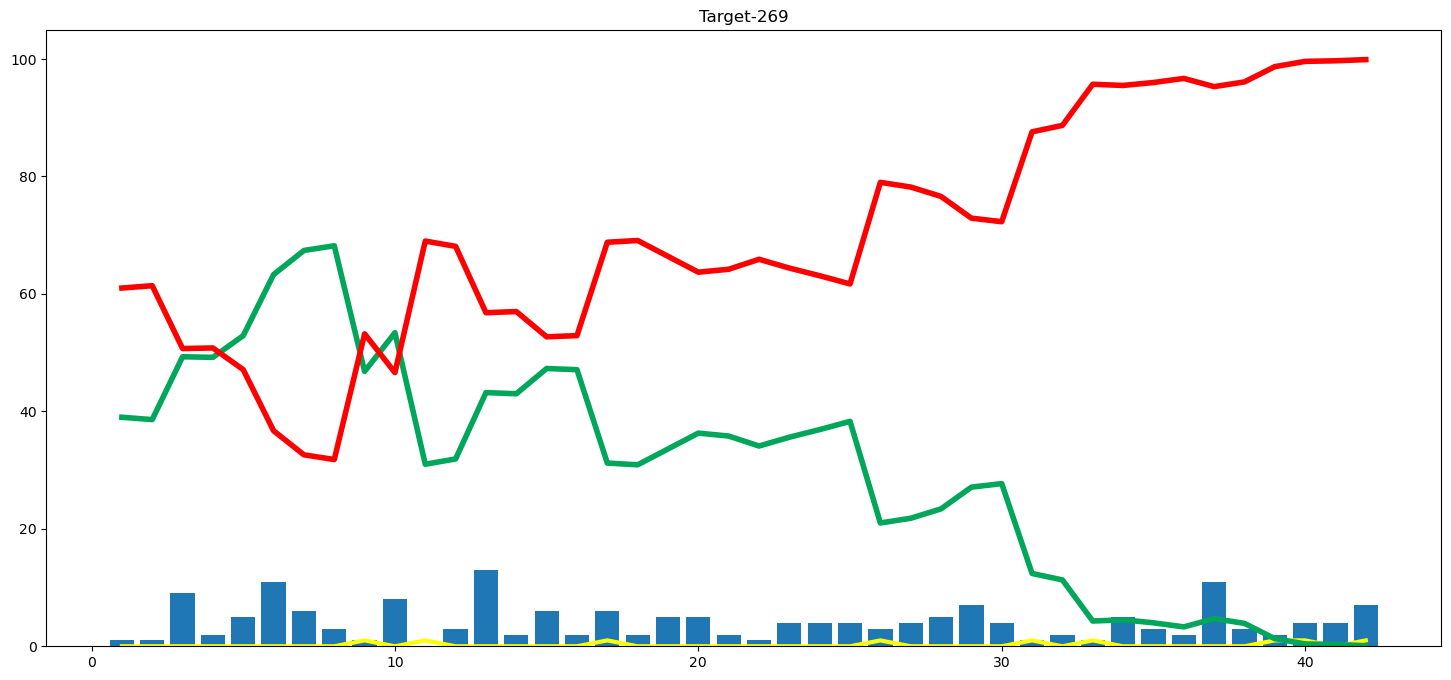

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [123]:

pickle.dump(pipe,open('pipe2.pkl','wb'))